### Câu 1

1.1

In [1]:
def binary(n: int) -> str:
    """Convert decimal number to base 2"""
    assert n >= 0, 'Number must be non-negative'
    representation = ''
    while n:
        remainder = str(n % 2)
        representation += remainder
        n //= 2
    return representation[::-1]

In [2]:
print(f'{binary(1) = }')
print(f'{binary(9) = }')
print(f'{binary(15) = }')
print(f'{binary(100) = }')
print(f'{binary(255) = }')

binary(1) = '1'
binary(9) = '1001'
binary(15) = '1111'
binary(100) = '1100100'
binary(255) = '11111111'


1.2

In [3]:
def binary_perform(n):
    n_before = n
    assignment = 0
    comparison = 1 # Because the last comparison break the while loop
    representation = ''
    while n:
        comparison += 1
        remainder = str(n % 2)
        representation += remainder
        n //= 2
        assignment += 3
    # return representation[::-1]
    print(f'With n = {n_before}, result is {representation[::-1]}, Assignment = {assignment}, Comparison = {comparison}')
    return assignment, comparison

In [4]:
N = [100*i for i in range(1, 11)]
assignments, comparisons = [], []
for n in N:
    assignment, comparison = binary_perform(n)
    assignments.append(assignment)
    comparisons.append(comparison)

# print(assignments)
# print(comparisons)

With n = 100, result is 1100100, Assignment = 21, Comparison = 8
With n = 200, result is 11001000, Assignment = 24, Comparison = 9
With n = 300, result is 100101100, Assignment = 27, Comparison = 10
With n = 400, result is 110010000, Assignment = 27, Comparison = 10
With n = 500, result is 111110100, Assignment = 27, Comparison = 10
With n = 600, result is 1001011000, Assignment = 30, Comparison = 11
With n = 700, result is 1010111100, Assignment = 30, Comparison = 11
With n = 800, result is 1100100000, Assignment = 30, Comparison = 11
With n = 900, result is 1110000100, Assignment = 30, Comparison = 11
With n = 1000, result is 1111101000, Assignment = 30, Comparison = 11


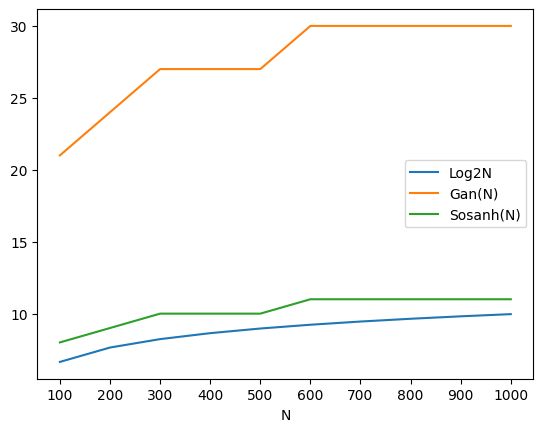

In [5]:
from math import log2
import matplotlib.pyplot as plt

log2_line = list(map(lambda x: log2(x), N))
plt.plot(log2_line, label='Log2N')
plt.plot(assignments, label='Gan(N)')
plt.plot(comparisons, label='Sosanh(N)')
plt.xlabel('N')
plt.xticks([i for i in range(10)], N)
plt.legend()
plt.show()

### Câu 2 (Bonus)

In [6]:
from random import randint

def generate_ab(k):
    a = randint(1, k)
    b = randint(1, k)
    while b == a:
        b = randint(1, k)

    if a > b:
        a, b = b, a # swap a and b if a > b

    return a, b

def generate_A(N, k):
    return [randint(1, k) for _ in range(N)]

In [7]:
def algorithm(A, a, b, k):
    """Algorithm return number of elements in range [a, b]"""

    count = [0] * (k + 1)
    assignment = 1
    comparison = 0

    for num in A:
        count[num] += 1
        assignment += 1

    cum_sum = [0] * (k + 1)
    cum_sum[0] = count[0]
    assignment += 2

    for i in range(1, k + 1):
        cum_sum[i] = cum_sum[i - 1] + count[i]
        assignment += 1

    result = cum_sum[b] - cum_sum[a - 1]
    # print(f'Number of elements in [{a}, {b}]: {result}')
    return assignment, comparison

Trường hợp 1, k cố định = 100

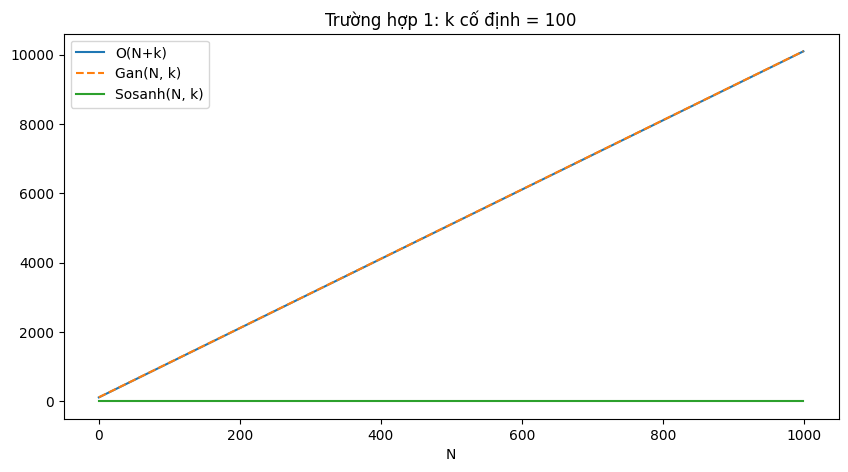

In [8]:
bigO_list = []
assignments = []
comparisons = []
k = 100
for N in [10*i for i in range(1, 1001)]:
    # print(f'{N = }, {k = }', end=', ')
    A = generate_A(N, k)
    a, b = generate_ab(k)
    assignment, comparison = algorithm(A, a, b, k)
    bigO = N + k
    # print(f' - {bigO = }')

    bigO_list.append(bigO)
    assignments.append(assignment)
    comparisons.append(comparison)

plt.figure(figsize=(10, 5))
plt.plot(bigO_list, label='O(N+k)')
plt.plot(assignments, label='Gan(N, k)', linestyle='dashed')
plt.plot(comparisons, label='Sosanh(N, k)')
plt.xlabel('N')
plt.legend()
plt.title('Trường hợp 1: k cố định = 100')
plt.show()

Trường hợp 2: N cố định = 20000

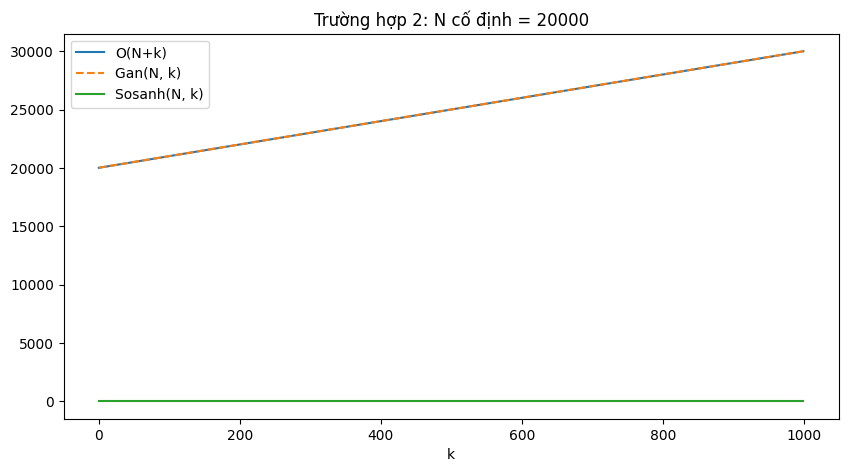

In [9]:
bigO_list = []
assignments = []
comparisons = []
N = 20000
for k in [10*i for i in range(1, 1001)]:
    A = generate_A(N, k)
    a, b = generate_ab(k)
    assignment, comparison = algorithm(A, a, b, k)
    bigO = N + k
    bigO_list.append(bigO)
    assignments.append(assignment)
    comparisons.append(comparison)

plt.figure(figsize=(10, 5))
plt.plot(bigO_list, label='O(N+k)')
plt.plot(assignments, label='Gan(N, k)', linestyle='dashed')
plt.plot(comparisons, label='Sosanh(N, k)')
plt.xlabel('k')
plt.legend()
plt.title('Trường hợp 2: N cố định = 20000')
plt.show()

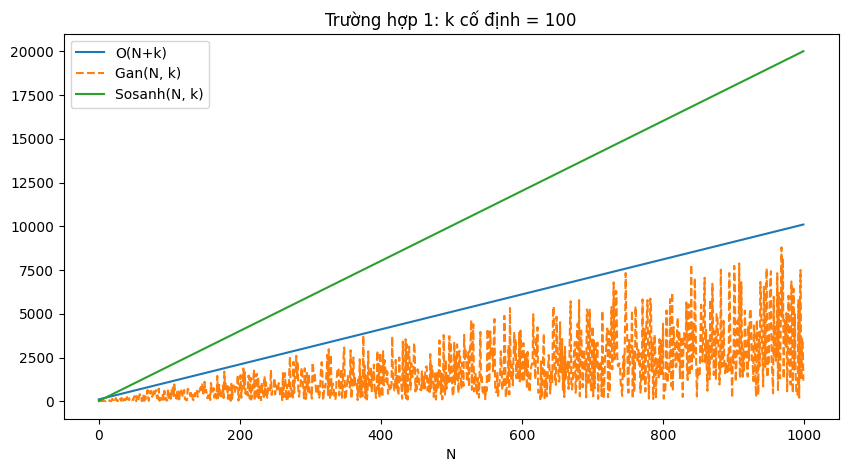

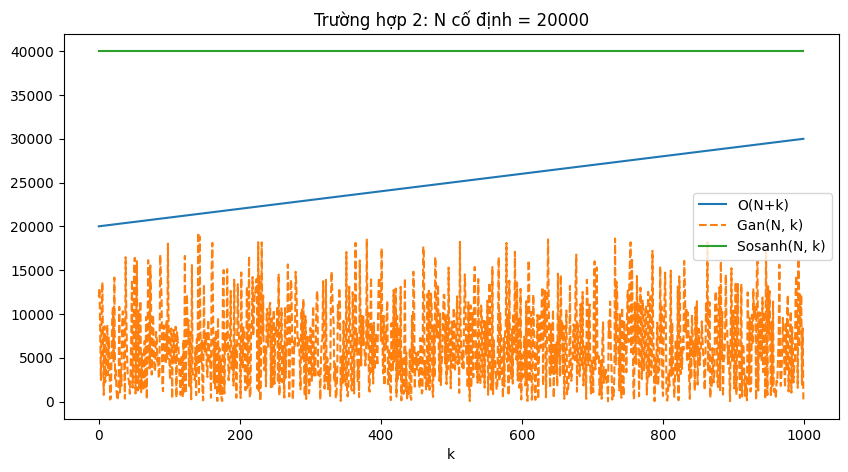

In [10]:
def algorithm2(A, a, b):
    """Algorithm return number of elements in range [a, b] with O(N)"""

    inner = 0
    assignment = 1 # because assign inner = 0
    comparison = 0

    for element in A:
        comparison += 2
        if a <= element <= b:
            inner += 1
            assignment += 1

    # print(f'Number of elements in [{a}, {b}]: {inner}, {assignment = }, {comparison = }')
    return assignment, comparison


bigO_list = []
assignments = []
comparisons = []
k = 100
for N in [10*i for i in range(1, 1001)]:
    # print(f'{N = }, {k = }', end=', ')
    A = generate_A(N, k)
    a, b = generate_ab(k)
    assignment, comparison = algorithm2(A, a, b)
    bigO = N + k
    # print(f' - {bigO = }')

    bigO_list.append(bigO)
    assignments.append(assignment)
    comparisons.append(comparison)

plt.figure(figsize=(10, 5))
plt.plot(bigO_list, label='O(N+k)')
plt.plot(assignments, label='Gan(N, k)', linestyle='dashed')
plt.plot(comparisons, label='Sosanh(N, k)')
plt.xlabel('N')
plt.legend()
plt.title('Trường hợp 1: k cố định = 100')
plt.show()

bigO_list = []
assignments = []
comparisons = []
N = 20000
for k in [10*i for i in range(1, 1001)]:
    A = generate_A(N, k)
    a, b = generate_ab(k)
    assignment, comparison = algorithm2(A, a, b)
    bigO = N + k
    bigO_list.append(bigO)
    assignments.append(assignment)
    comparisons.append(comparison)

plt.figure(figsize=(10, 5))
plt.plot(bigO_list, label='O(N+k)')
plt.plot(assignments, label='Gan(N, k)', linestyle='dashed')
plt.plot(comparisons, label='Sosanh(N, k)')
plt.xlabel('k')
plt.legend()
plt.title('Trường hợp 2: N cố định = 20000')
plt.show()